# Search methods
(for continuous functions)

## All iterative search methods do this:

1. Start with an initial guess, $x_0$, for the minimum of $f(x)$
1. Propose a __search direction__, $d_k$
1. Propose a step size $\alpha_k$ along $d_k$ (possibly by an inner __line search__ loop to find the lowest value of $f$ along d_k)
1. Update the estimate of the minimum location, $x_{k+1} = x_k+\alpha_k d_k$
1. Iterate from 2. until convergence 

Most of the effort in designing an algorithm goes into step 2, proposing a search direction.

## Convergence

Can be assessed by a variety of measures:

\begin{align}
\left\| f(x_{k+1}) - f(x_k)\right\| &\lt \varepsilon_f\\
\\
\left\| x_{k+1} - x_k\right\| &\lt \varepsilon_x\\
\\
\left\| \nabla f(x_k)\right\| &\lt \varepsilon_g\\
\end{align}

- The test on the gradient is most often used, but when curvatures are small, it should be combined with a test on change the location. 
- Convergence can only ever be certified to a local minimum. Only in the case of convex functions is there guarantee about the global minimum.

## Rate of convergence

The __rate of convergence__ of an algorithm is assessed by how much progress is made in towards the minimum in each iteration. Often progress takes the following form:

$$
\lim_{k\rightarrow\infty} \frac{\left\| x_{k+1}-x^*\right\|}{\left\| x_k-x^* \right\|^p} = \beta
$$

- $\beta$ is the __convergence ratio__ (the smaller the better)

- $p$ is the __order of convergence__ (the larger the better)

## 1D search

Search in one variable is the same as _line search_, which is the goal of the inner loop of multi-variable search. 

- The _dumbest_ way to do 1D search is to increment the variable by a fixed (small) step size
- Significantly better is __interval reduction__ (which is about the best you can do if the gradient is not available)

In [1]:
from pylab import *
import numpy as np
# function we will optimize
def R(x):
    return x**2+(345*1000)/(np.pi*x)

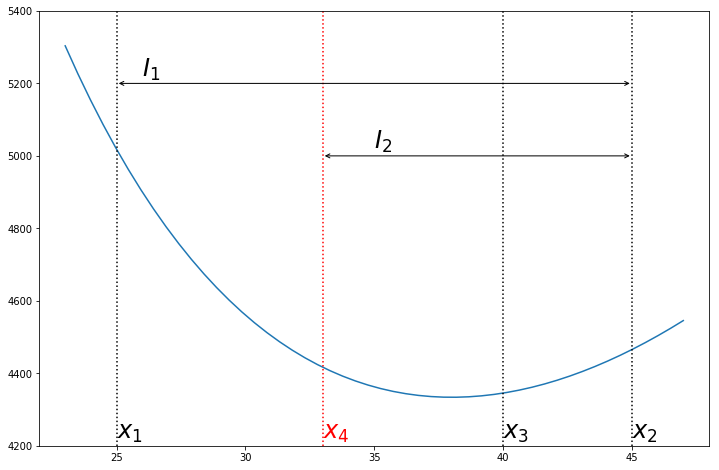

In [32]:
figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
plot((25,25),(ymin,ymax), 'k:' ) ; text(25, 4220, "$x_1$", fontsize=24)
plot((45,45),(ymin,ymax), 'k:' ) ; text(45, 4220, "$x_2$", fontsize=24)
plot((40,40),(ymin,ymax), 'k:' ) ; text(40, 4220, "$x_3$", fontsize=24)
plot((33,33),(ymin,ymax), 'r:' ) ; text(33, 4220, "$x_4$", fontsize=24, color='r')
annotate(s='', xy=(25,5200), xytext=(45,5200), arrowprops=dict(arrowstyle='<->')); text(26,5220, "$I_1$", fontsize=24)
annotate(s='', xy=(33,5000), xytext=(45,5000), arrowprops=dict(arrowstyle='<->')); text(35,5020, "$I_2$", fontsize=24)
show()

- Start with three points, $x_1,x_2,x_3$ such that $f(x_1) \gt f(x_3)$ and $f(x_3) \lt f(x_2)$
- We therefore have a minimum somewhere in the interval $I_1 = [x_1,x_2]$
- Compute $f(x_4)$ a fourth point $x_4 \in I_1$
- If $f(x_4) \gt f(x_3)$, the minimum is in $I_2 = [x_4,x_2]$
- else the minimum is in $I'_2 = [x_1,x_3]$

## Golden section search

Where to put the interior points? Constant reduction factor $\beta$ in interval size (convergence is linear)

$$\frac{I_2}{I_1} = \frac{\Delta x}{I_2} \text{ with }\Delta x = I_1 - I_2$$

put $\beta=I_2/I_1$, solve quadratic:

$$\beta = \frac{\sqrt{5}-1}{2}\approx 0.618$$

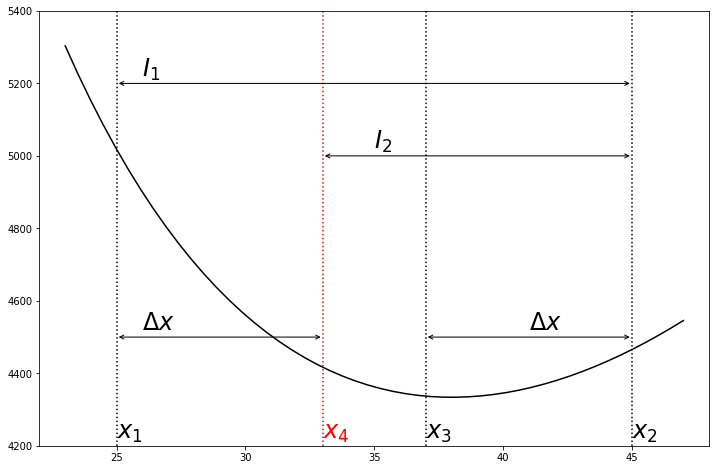

In [57]:
figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
plot((25,25),(ymin,ymax), 'k:' ) ; text(25, 4220, "$x_1$", fontsize=24)
plot((45,45),(ymin,ymax), 'k:' ) ; text(45, 4220, "$x_2$", fontsize=24)
plot((37,37),(ymin,ymax), 'k:' ) ; text(37, 4220, "$x_3$", fontsize=24)
plot((33,33),(ymin,ymax), 'r:' ) ; text(33, 4220, "$x_4$", fontsize=24, color='r')
annotate(s='', xy=(25,5200), xytext=(45,5200), arrowprops=dict(arrowstyle='<->')); text(26,5220, "$I_1$", fontsize=24)
annotate(s='', xy=(33,5000), xytext=(45,5000), arrowprops=dict(arrowstyle='<->')); text(35,5020, "$I_2$", fontsize=24)
annotate(s='', xy=(37,4500), xytext=(45,4500), arrowprops=dict(arrowstyle='<->')); text(41,4520, "$\Delta x$", fontsize=24)
annotate(s='', xy=(25,4500), xytext=(33,4500), arrowprops=dict(arrowstyle='<->')); text(26,4520, "$\Delta x$", fontsize=24)
show()

In [2]:
def golden_section(f, x1, x2, tol):
    # initial points
    f1 = f(x1)
    f2 = f(x2)
    # now set up golden section ratios
    r = (np.sqrt(5)-1)/2.0
    # third point
    x3 = x1*(1-r)+x2*r; f3=f(x3)

    # now loop until convergence
    traj = []
    while abs(x1-x2) > tol:
        x4 = x1*r+x2*(1-r); f4=f(x4)
        traj.append((x1, x2, x3, x4))
        #print x1, x4, x3, x2
        if f4 < f3:
            x2=x3; f2=f3
            x3=x4; f3=f4
        else:
            x1=x2; f1=f2
            x2=x4; f2=f4
    return x3,traj


x, t = golden_section(R, 25, 45, 0.5)

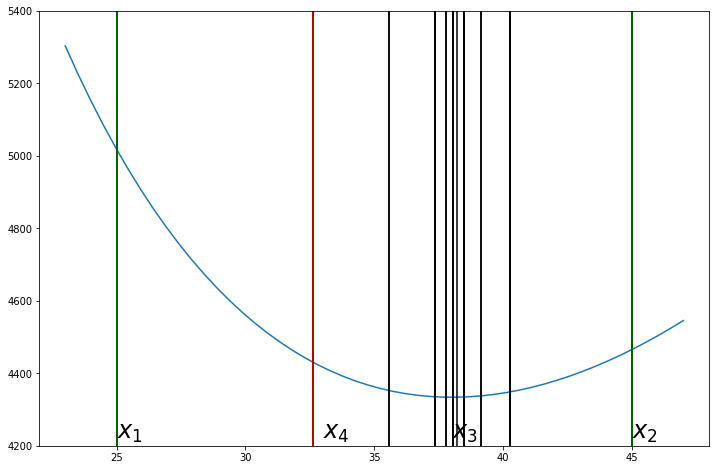

In [3]:

fig = figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
text(25, 4220, "$x_1$", fontsize=24)
text(45, 4220, "$x_2$", fontsize=24)
text(38, 4220, "$x_3$", fontsize=24)
text(33, 4220, "$x_4$", fontsize=24)

def animate(i):
    ax=gca()
    for j in range(1,len(ax.lines)):
        ax.lines[j].set_color('k')
    plot((t[i][0],t[i][0]),(ymin,ymax), 'g' ) 
    plot((t[i][1],t[i][1]),(ymin,ymax), 'g' )  
    plot((t[i][2],t[i][2]),(ymin,ymax), 'k' )  
    plot((t[i][3],t[i][3]),(ymin,ymax), "r")


import matplotlib.animation
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=500)

from IPython.display import HTML
HTML(ani.to_jshtml())

## Robustness

How could the previous program go wrong? 

- What happens when the initial interval does not contain a minimum? 
- How could we ensure that it does? 
- How can we come up with an initial interval?


Much of practical optimisation is actually about __robustness__, creating software that copes with unexpected situations

## How can we do better ? 

Rather than just knowing there must be a minimum in the interval $(x1,x2)$, we can _fit a quadratic_  

$$
q(x) = a_0 + a_1 x + a_2 x^2
$$

to best match $f(x)$ at the three points, and test the point at the minimum of the quadratic.

(It's the same old idea of approximating the problem with a simpler one, which we then solve.)


To the right coefficients, we want the two functions to coincide at the three points:

$$
\begin{array}
\\
f(x_1) &= a_0 + a_1 x_1 + a_2 x_1^2\\
f(x_2) &= a_0 + a_1 x_2 + a_2 x_2^2\\
f(x_3) &= a_0 + a_1 x_3 + a_2 x_3^2\\
\end{array}
$$
or
$$
\begin{bmatrix}
f(x_1)\\
f(x_2)\\
f(x_3)\\
\end{bmatrix}
=
\begin{bmatrix}
1&x_1&x_1^2\\
1&x_2&x_2^2\\
1&x_3&x_3^2\\
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
\end{bmatrix}
$$

so the vector of coefficients can be obtained by inverting the matrix above and multiplying it into the vector of function values. 

''

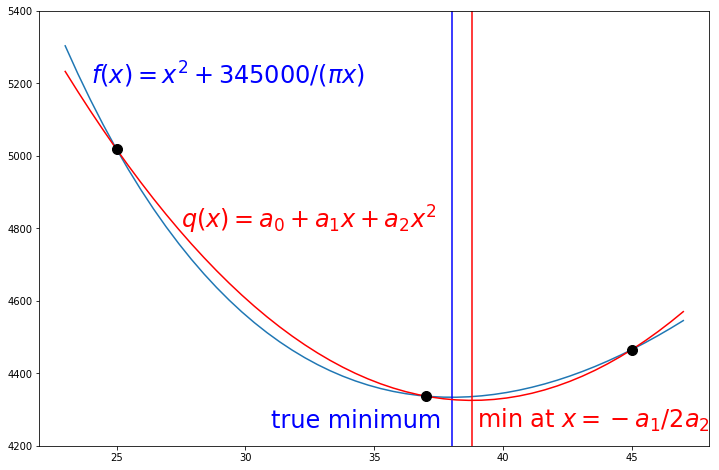

In [62]:
figure(figsize=(12,8))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
x = np.linspace(23,47,50)
# function
plot(x, R(x)); text(24, 5200, "$f(x) = x^2 + 345000/(\pi x)$", color='b', fontsize=24)

# true minimum
plot([38,38], [ymin,ymax], "b-"); text(31, 4250, "true minimum", color="b", fontsize=24)

# quadratic approx
x1=25; x2=45; x3=37
m = np.matrix([[1, x1, x1**2],[1, x2, x2**2], [1, x3, x3**2]])
a = np.dot(np.linalg.inv(m),np.matrix([[R(x1)],[R(x2)],[R(x3)]]))
plot(x, a[0,0]+a[1,0]*x+a[2,0]*x**2, 'r-')
plot([x1,x2,x3],[R(x1),R(x2),R(x3)], "ko", markersize=10)
text(27.5, 4800, "$q(x) = a_0 + a_1 x + a_2 x^2$", color='r', fontsize=24)

# minimum of quadratic approx
x4 = -a[1,0]/(2*a[2,0])
plot([x4, x4], [ymin,ymax], "r-") ; text(39,4250, "min at $x=-a_1/2a_2$", color="r", fontsize=24)

""

## Newton's method

There is another way to fit a polynomial. Instead of fitting to the function value at three points, we can fit to the function value, gradient, and second derivative all evaluated at a single point. 

$$
f(x) = f(x_0) + (x-x_0) f'(x_0) + \frac12 (x-x_0)^2 f''(x_0) + \ldots
$$

Drop the terms beyond the quadratic, so 

$$
q(x) = f(x_0) + (x-x_0) f'(x_0) + \frac12 (x-x_0)^2 f''(x_0)
$$

(Notice, this is not an approximation any more). To get the minimum of $q(x)$,

$$
q'(x) = f'(x_0) + (x-x_0) f''(x_0) = 0
$$

$$
x = x_0 - \frac{f'(x_0)}{f''(x_0)}
$$

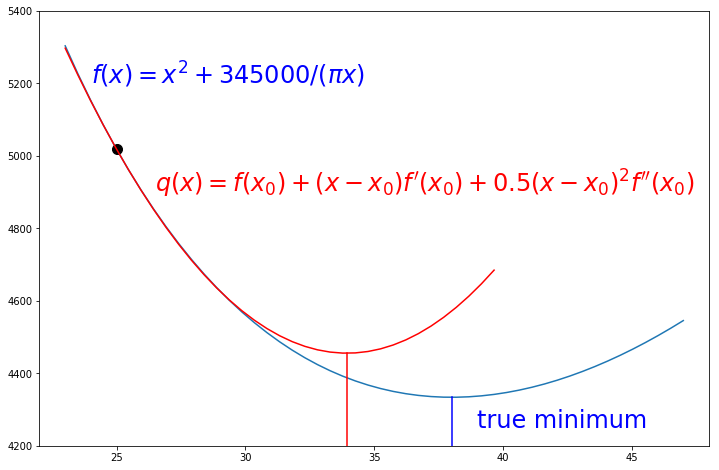

In [58]:
figure(figsize=(12,8))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
x = np.linspace(23,47,50)
# function
plot(x, R(x)); text(24, 5200, "$f(x) = x^2 + 345000/(\pi x)$", color='b', fontsize=24)

# true minimum
plot([38,38], [ymin,R(38)], "b-"); text(39, 4250, "true minimum", color="b", fontsize=24)

# quadratic approx
def Rp(x):
    return 2*x-(345*1000)/(np.pi*x**2)
def Rpp(x):
    return 2*(345*1000)/(np.pi*x**3)

x0=25
plot([x0],[R(x0)], "ko", markersize=10)
def q(x):
    return R(x0)+(x-x0)*Rp(x0)+0.5*(x-x0)**2*Rpp(x0)
plot(x[:35], q(x[:35]), 'r-')
text(26.5, 4900, "$q(x) = f(x_0) + (x-x_0)f'(x_0) + 0.5(x-x_0)^2 f''(x_0)$", color='r', fontsize=24)
x1=x0-Rp(x0)/Rpp(x0)
plot([x1, x1], [ymin,q(x1)], "r"); 

### Remarks

- Not as good as previous 3-point method
- "Sensitive" to initial point
- Can make estimate much worse!
- What if $f''(x_0)$ is zero??

- Both polynomial fitting methods can be iterated to refine esimate
- Newton's method, when it works, has quadratic ($p=2$) convergence 
- Newton's method _generalises_ to multidimensional searches!